In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Executive Summary

The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

Loading Data of the two csv into Dataframes

In [3]:
cars=pd.read_csv("cars_multi.csv")
prices=pd.read_csv("cars_price.csv")

Merge the two dataframes together using the ID field

In [4]:
data=pd.merge(cars,prices, on='ID')

In [5]:
data.head()

,ID,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,price
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,25561.59078
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24221.42273
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,27240.84373
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,33684.96888
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,20000.00000


Cleaning the Data, here we clean the data for the column horsepower, then we clean the Database of NaN values

In [29]:
#https://datatofish.com/dropna/
data['horsepower'] = data['horsepower'].apply(pd.to_numeric, errors='coerce')
data = data.dropna()

Analyzing the Distribution of some Variables:

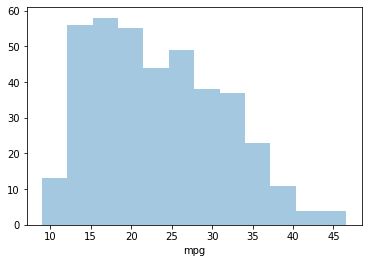

In [24]:
#https://datavizpyr.com/histograms-with-seaborn-in-python/
sns.distplot(data['mpg'], kde=False)

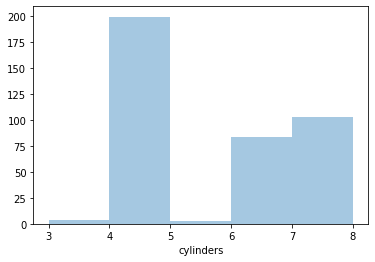

In [25]:
sns.distplot(data['cylinders'], kde=False)

There are about twice as many four-cylinder cars in the sample as there are six- or eight-cylinder cars.

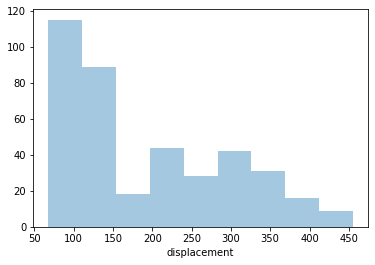

In [26]:
sns.distplot(data['displacement'], kde=False)

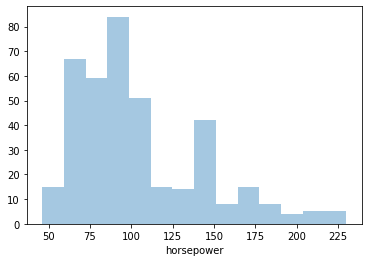

In [27]:
sns.distplot(data['horsepower'], kde=False)

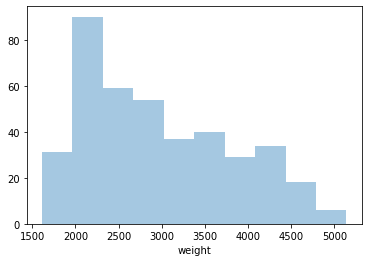

In [21]:
sns.distplot(data['weight'], kde=False)

The distributions for MPG, displacement, horsepower, and weight 
are all skewed right–a longer tail toward the higher end of the scale. And there are many more four-cylinder cars than six- or eight-cylinder cars. This supports an intuition that there is a strong correlation between all of those variables.

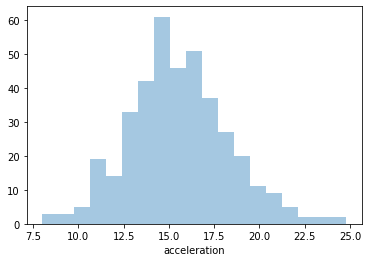

In [30]:
sns.distplot(data['acceleration'], kde=False)

Acceleration has a non-skewed, normal distribution, so perhaps it is less correlated with the other variables.

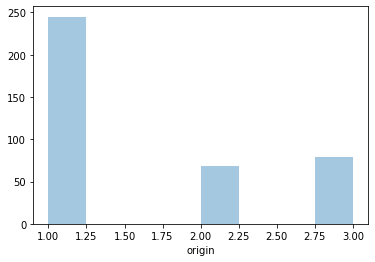

In [31]:
sns.distplot(data['origin'], kde=False)

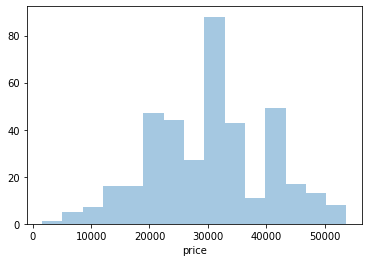

In [32]:
sns.distplot(data['price'], kde=False)

Creating a Correlation Matrix

In [16]:
corrMatrix =data.corr()

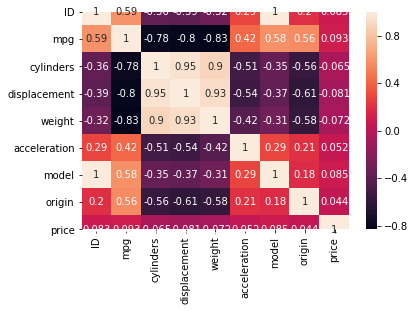

In [21]:
sns.heatmap(corrMatrix, annot=True)